# 1.1 Tabular data analysis
**This notebook is inspired by the [CMI-PIU: Features EDA](https://www.kaggle.com/code/antoninadolgorukova/cmi-piu-features-eda) for exploratory tabular data analysis.**

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
import seaborn as sns
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set(style="whitegrid")
%matplotlib inline

**Load data**

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**This competition aims to predict the Severity Impairment Index (sii), which measures the level of problematic internet use among children and adolescents, based on physical activity data and other features. "sii" is derived from PCIAT-PCIAT_Total, the sum of scores from the Parent-Child Internet Addiction Test (PCIAT: 20 questions, scored 0-5).**

The "sii" index is evaluated based on the PCIAT_Total with the following corresponding ranges
* sii = 0 --> None (PCIAT_Total from 0 - 30)
* sii = 1 --> Mile (PCIAT_Total from 31 to 49)
* sii = 2 --> Moderate (PCIAT_Total from 50 to 79)
* sii = 3 --> Severe (PCIAT_Total from 80 and more)

**It is observed that the training set contains 82 columns, while the test set includes only 59 columns. The cell below highlights the columns that are present in the test set but absent in the training set. Aside from the "sii" column, which serves as the target, the columns labeled as PCIAT range from 1 to 20, in addition to "PCIAT Total" and "PCIAT Season". This means that these columns must be execuled during the training process so that the built model can perform precisely on the test set**

In [5]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
columns_not_in_test

['PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_Total',
 'PCIAT-Season',
 'sii']

## Check missing answers

**Few SII scores are still derived from the sum of NAN values in PICAT questions, leading to potentially invalid SII values.**

In [6]:
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,Summer,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,Fall,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,Fall,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,Winter,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,Spring,0.000000


**The cell below tries to recalculate the "sii" value based on the current value and the maximum possible values.**

In [7]:
#Generate a list of column names in the format PCIAT-PCIAT_XX
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

#Recalculates the SII value based on the the current PCIAT values and the possible maximum PCIAT values
def recalculate_sii(row):
    value = 0
    if (not pd.isna(row['PCIAT-PCIAT_Total'])):
        value = row['PCIAT-PCIAT_Total']
        
    max_possible = value + row[PCIAT_cols].isna().sum() * 5
    
    if value <= 30 and max_possible <= 30:
        return 0
    elif 31 <= value <= 49 and max_possible <= 49:
        return 1
    elif 50 <= value <= 79 and max_possible <= 79:
        return 2
    elif value >= 80 and max_possible >= 80:
        return 3
    
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

**Show the rows where their "sii" values are not valid**

In [8]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


**Update the current "sii" values with re-calculated "sii" values**

In [9]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

train.drop(columns='recalc_sii', inplace=True)

**The plot below illustrates the distribution of "sii" values in the training set. The most common value is "None," which corresponds to sii = 0. Notably, missing sii values account for nearly one-third of the total available data (31.3%), presenting a challenge for developing out-performed models. This raises the question of whether we should only use samples with "sii" values or if there is a way to leverage samples with missing sii values, or also called unlabeled data. Therefore, we have decided to explore 2 different approaches: the first one is just only utilizing Supervised Learning exclusively on labeled data, while the second employs Self and Semi-Supervised Learning to make full use of the existing data sources, incorporating both labeled and unlabeled data.**

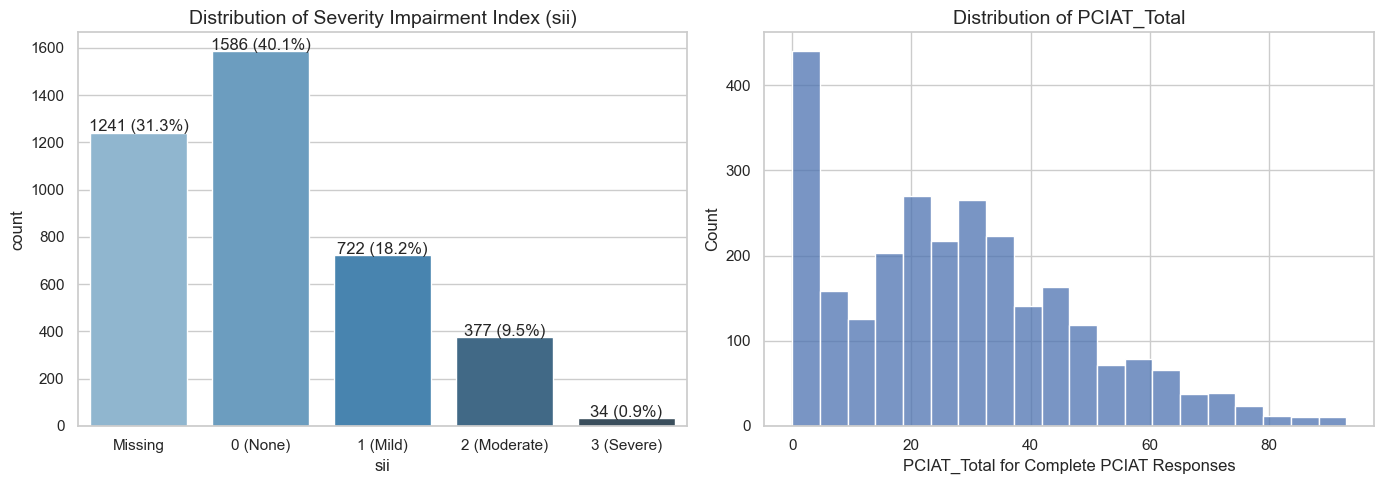

In [10]:
sii_counts = train['sii'].value_counts().reset_index()
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()

## Check missing features

**In addition to the fact that up to one-third of the data is unlabeled (missing "sii" values), the feature columns also suffer from the same. Some feature columns even lack of more than 90% values (such as PAQ_A-Season and PAQ_A-PAQ_A_Total). This phenominon is quite common in practice, where data collection always faces challenges, achieving a completely comprehensive dataset is nearly imposisble. The plot below allows us to identify the most noticable and stable features, and utilize other state-of-the-art techniques to fill in the missing data, ultimately enhancing the model's performance.**

**In this case, we have chosen the KNNImputer to fill in the missing values for the selected features (which have been considered as the most stable and prominent). Statistically, KNNImputer performs better than the traditional SimpleImputer method, which simply calculates the average value or similar statistics. However, KNNImputer requires more computational resources and the pre-determination of the hyperparameter K. We will use KNNImputer to learn from the available data in the training set and then apply it to fill in the missing values in both the training set and the test set. (More detail in the 1.3 - Data loading & Processing)**

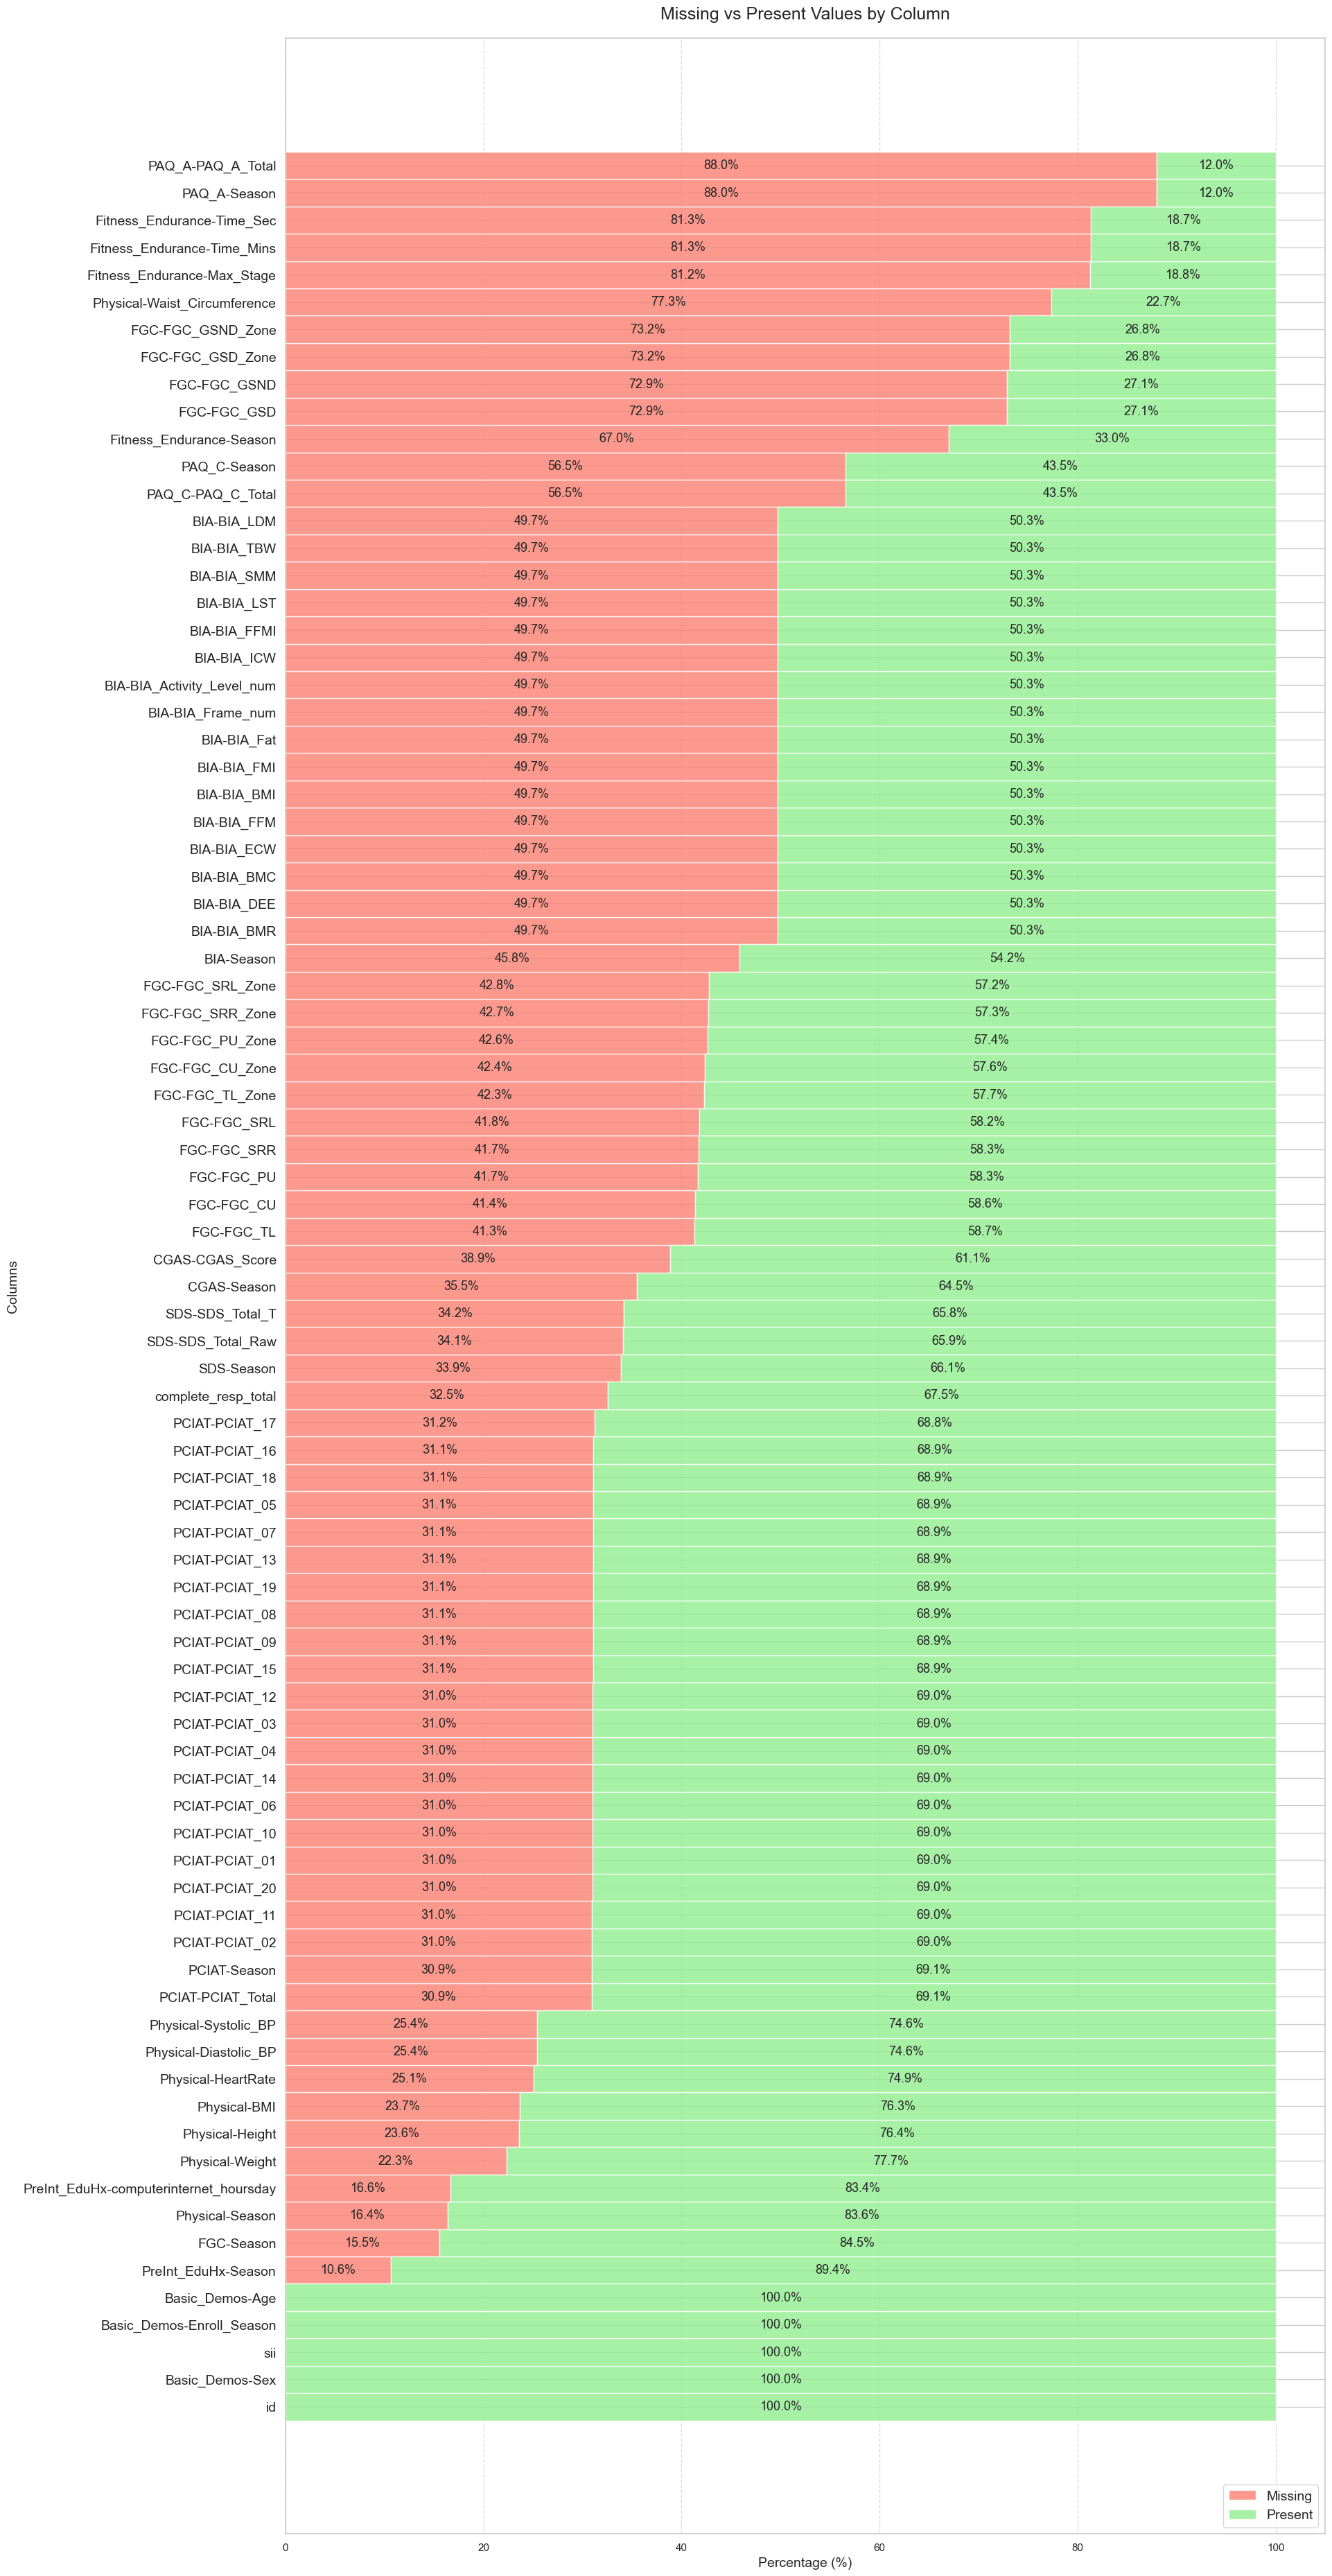

In [11]:
# Adjustable parameters
FIGURE_WIDTH = 30    # Width of the figure
FIGURE_HEIGHT = 40  # Height of the figure
BAR_SPACING = 3  # Spacing between bars (increase for more space)
BAR_HEIGHT = 3   # Height of bars (decrease for thinner bars)
FONT_SIZE_LABELS = 14  # Font size for axis labels
FONT_SIZE_TITLE = 18   # Font size for title
FONT_SIZE_TICKS = 14   # Font size for tick labels
FONT_SIZE_PERCENT = 13 # Font size for percentage labels
LEFT_MARGIN = 0.45     # Left margin (increase if labels are cut off)

# Calculate missing value counts and percentages
total_rows = len(train)
missing_counts = train.isna().sum()
missing_percent = (missing_counts / total_rows * 100).round(2)
non_missing_percent = 100 - missing_percent

# Sort values by missing percentage
sorted_indices = missing_percent.sort_values(ascending=True).index

# Create figure
plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))

# Plot stacked horizontal bars
y_pos = np.arange(len(sorted_indices)) * BAR_SPACING
plt.barh(y_pos, missing_percent[sorted_indices], color='salmon', alpha=0.8, 
         label='Missing', height=BAR_HEIGHT)
plt.barh(y_pos, non_missing_percent[sorted_indices], left=missing_percent[sorted_indices], 
         color='lightgreen', alpha=0.8, label='Present', height=BAR_HEIGHT)

# Customize plot
plt.yticks(y_pos, sorted_indices, fontsize=FONT_SIZE_TICKS)
plt.xlabel('Percentage (%)', fontsize=FONT_SIZE_LABELS)
plt.ylabel('Columns', fontsize=FONT_SIZE_LABELS)
plt.title('Missing vs Present Values by Column', fontsize=FONT_SIZE_TITLE, pad=20)
plt.legend(loc='lower right', fontsize=FONT_SIZE_LABELS)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels
for i, pos in enumerate(y_pos):
    if missing_percent[sorted_indices[i]] > 0:
        plt.text(missing_percent[sorted_indices[i]]/2, pos, 
                f'{missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', fontsize=FONT_SIZE_PERCENT)
    if non_missing_percent[sorted_indices[i]] > 0:
        plt.text(missing_percent[sorted_indices[i]] + non_missing_percent[sorted_indices[i]]/2, pos,
                f'{non_missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', fontsize=FONT_SIZE_PERCENT)

# Adjust layout
plt.subplots_adjust(left=LEFT_MARGIN, right=0.95, top=0.95, bottom=0.05)
plt.show()

**For more information about tabular data preprocessing and feature engineering, please refer to section 1.3 Data loading & Processing**